## Question 7

### Solution 7.a)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
img1 = cv2.imread("image1.jpg")
img2 = cv2.imread("image2.jpg")

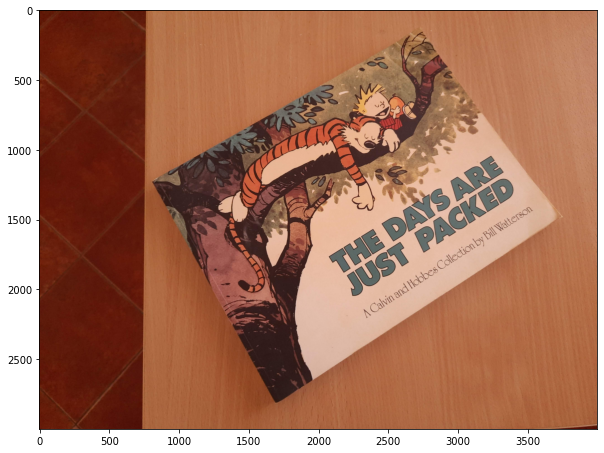

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [ ]:
pts1 = np.array([(850,1250),(1700,2790),(3750,1500),(2750,150)])

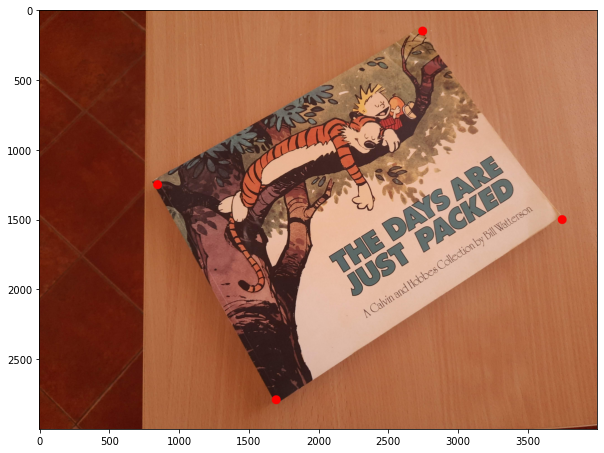

In [ ]:
img1_copy = img1.copy()
for pt in pts1:
  cv2.circle(img1_copy, pt,radius =0,color=(0,0,255),thickness=64)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img1_copy, cv2.COLOR_BGR2RGB))


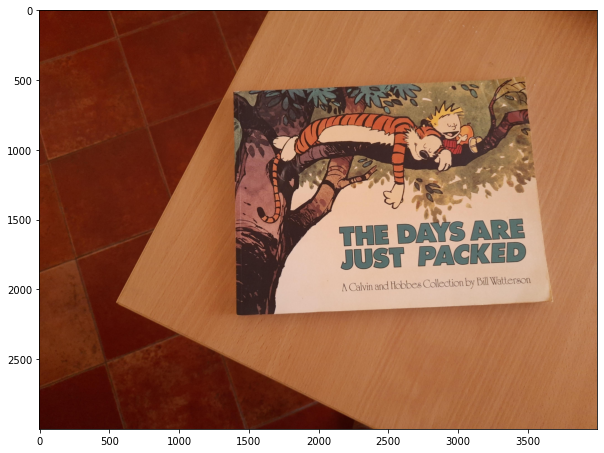

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
pts2 = np.array([(1400, 600), (1400, 2180),(3700, 2100), (3500, 500)])

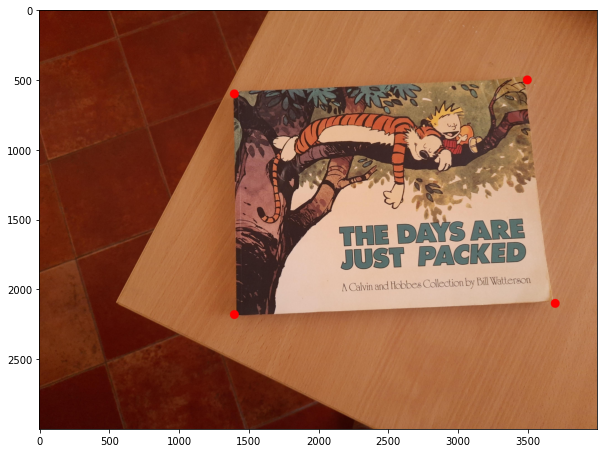

In [ ]:
img2_copy = img2.copy()
for pt in pts2:
  cv2.circle(img2_copy, pt,radius =0,color=(0,0,255),thickness=64)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img2_copy, cv2.COLOR_BGR2RGB))


### Solution 7.b)


$X_{i}' = (x_{i}',y_{i}',w_{i}')^{T}$ , Where i =1,2,3,4 \
We have A = \begin{matrix} [0 & 0 & 0  & - w_{1}'*X_1 ^T & y_{1}'*X_1 ^T \\ w_{1}'*X_1 ^T  & 0 & 0 & 0 & x_{1}'*X_1 ^T  \\  0 & 0 & 0  & - w_{2}'*X_2 ^T  &  y_{2}'*X_2 ^T \\ w_{2}'*X_2 ^T  &   0 & 0 & 0 & x_{2}'*X_2 ^T  \\  0 & 0 & 0 & - w_{3}'*X_3 ^T  &  y_{3}'*X_3 ^T \\ w_{3}'*X_3 ^T  & 0 & 0 &  0 & x_{3}'*X_3 ^T \\  0 & 0 & 0 & - w_{4}'*X_4 ^T  & y_{4}'*X_4 ^T \\ w_{4}'*X_4 ^T  &  0 & 0 & 0 & x_{4}'*X_4 ^T ] \end{matrix}


In [ ]:
A = []
for i in range(len(pts1)):
  A.append([0, 0, 0, pts1[i][0], pts1[i][1], 1, -pts2[i][1]*pts1[i][0], -pts2[i][1]*pts1[i][1], -pts2[i][1]])
  A.append([pts1[i][0], pts1[i][1], 1, 0, 0, 0, -pts2[i][0]*pts1[i][0], -pts2[i][0]*pts1[i][1], -pts2[i][0]])
A=np.array(A)
U,D,V = np.linalg.svd(A)
print("The rank of the matrix is:",np.linalg.matrix_rank(A))

The rank of the matrix is: 8


In [ ]:
V.shape

(9, 9)

In [ ]:
H_cal = V[-1,:].reshape(3,3)
H_cal


array([[-5.10572212e-04,  2.74170651e-04, -8.54353586e-01],
       [-2.73962711e-04, -5.53673045e-04,  5.19691045e-01],
       [ 1.43314724e-08, -1.33664334e-08, -6.70921319e-04]])

In [ ]:
H_cal = H_cal/V[-1,-1]
H_cal

array([[ 7.61001622e-01, -4.08647994e-01,  1.27340354e+03],
       [ 4.08338062e-01,  8.25242885e-01, -7.74593132e+02],
       [-2.13608839e-05,  1.99225050e-05,  1.00000000e+00]])

### Solution 7.c)

In [ ]:
H, status = cv2.findHomography(pts1,pts2)

In [ ]:
H

array([[ 7.61001622e-01, -4.08647994e-01,  1.27340354e+03],
       [ 4.08338062e-01,  8.25242885e-01, -7.74593132e+02],
       [-2.13608839e-05,  1.99225050e-05,  1.00000000e+00]])

### Solution 7.d)

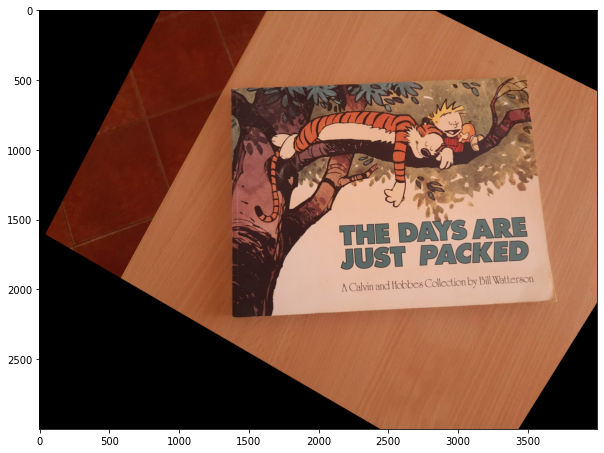

In [ ]:
img1_warp = cv2.warpPerspective(img1, H_cal, (img2.shape[1], img2.shape[0]))
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img1_warp, cv2.COLOR_BGR2RGB))

As we can see in image1, the book was tilted and the table on which it has been kept was almost straight but now after applying homography, the book is straight but the table has becme tilted.
There was also a dark brown floor below the table which can be seen in image1 as well as image2, but since our image1 after homography didn't know what to do with the remaining portion, it has been coloured black.


# Question 8

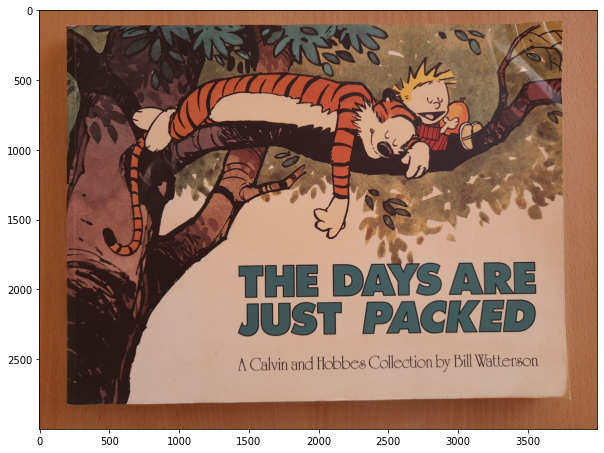

In [ ]:
img3 = cv2.imread("image3.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

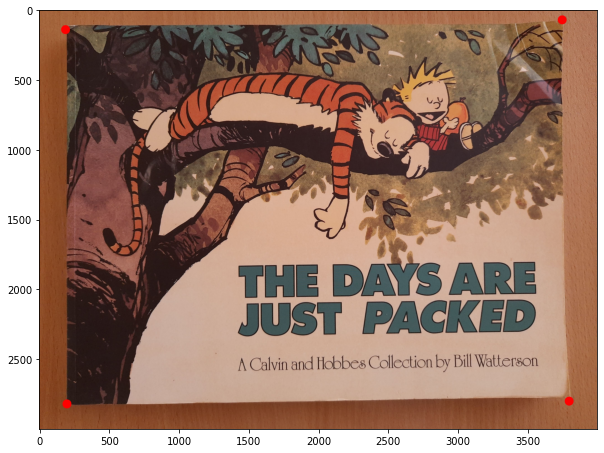

In [ ]:
pts3 = [(190,140),(200,2820),(3800,2800),(3750,70)]
img3_copy = img3.copy()
for pt in pts3:
  cv2.circle(img3_copy, pt,radius =0,color=(0,0,255),thickness=64)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img3_copy, cv2.COLOR_BGR2RGB))


In [ ]:
A = []
for i in range(len(pts1)):
  A.append([0, 0, 0, pts1[i][0], pts1[i][1], 1, -pts3[i][1]*pts3[i][0], -pts3[i][1]*pts1[i][1], -pts3[i][1]])
  A.append([pts1[i][0], pts1[i][1], 1, 0, 0, 0, -pts3[i][0]*pts3[i][0], -pts3[i][0]*pts1[i][1], -pts3[i][0]])
A=np.array(A)
U,D,V = np.linalg.svd(A)

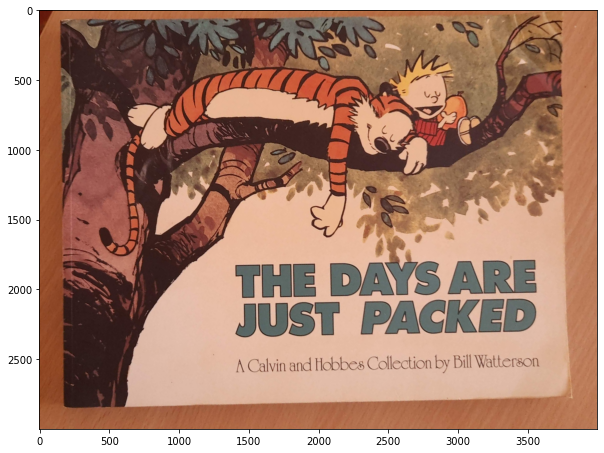

In [ ]:
H_cal = V[-1,:].reshape(3,3)
H_cal = H_cal/V[-1,-1]
img1_warp = cv2.warpPerspective(img1, H_cal, (img3.shape[1], img3.shape[0]))
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img1_warp, cv2.COLOR_BGR2RGB))

# Solution 9

## 1st use case of Homograpgy: Virtual Billboards

In [ ]:
b1 = cv2.imread("board1.jpg")
b2 = cv2.imread("board2.jpg")
b2.shape

(506, 900, 3)

In [ ]:
b1 = cv2.resize(b1,(900,506))

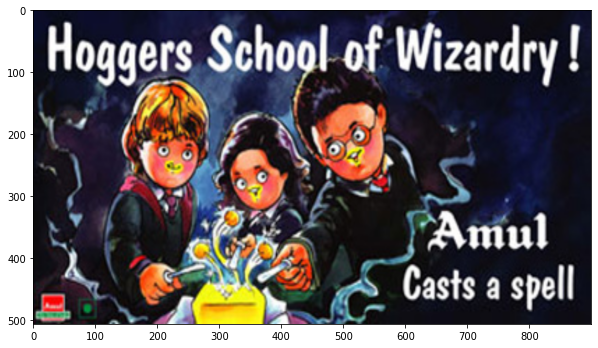

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(b1, cv2.COLOR_BGR2RGB))


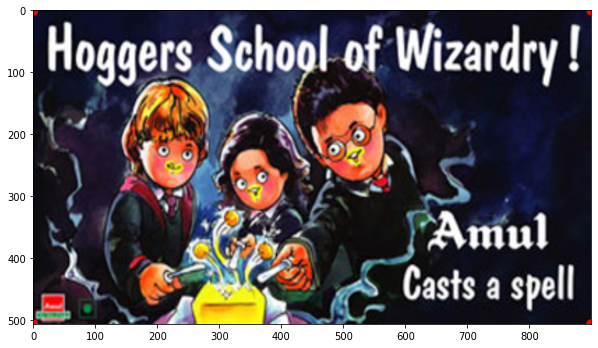

In [ ]:
pts1_b = [(1,1),(1,505),(899,505),(899,1)]
b1_copy = b1.copy()
for pt in pts1_b:
  cv2.circle(b1_copy, pt,radius =0,color=(0,0,255),thickness=14)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(b1_copy, cv2.COLOR_BGR2RGB))

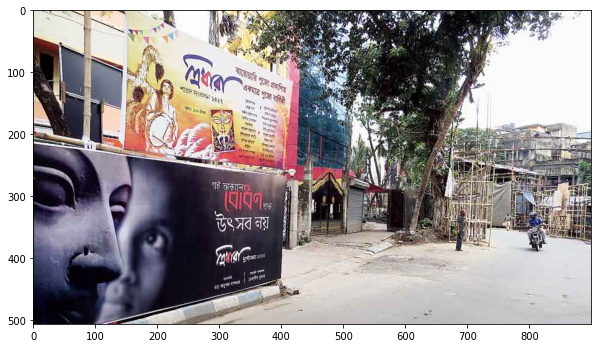

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(b2, cv2.COLOR_BGR2RGB))

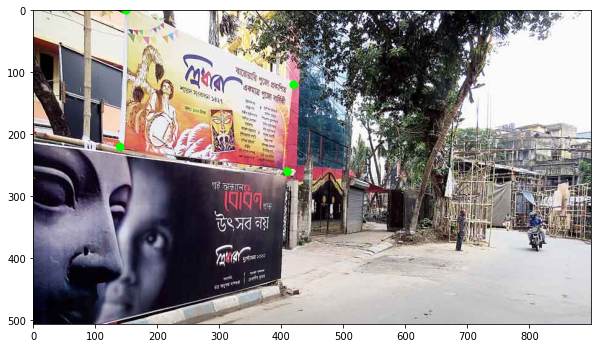

In [ ]:
pts2_b = [(150,0),(140,220),(410,260),(420,120)]
b2_copy = b2.copy()
for pt in pts2_b:
  cv2.circle(b2_copy, pt,radius =0,color=(0,255,0),thickness=14)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(b2_copy, cv2.COLOR_BGR2RGB))


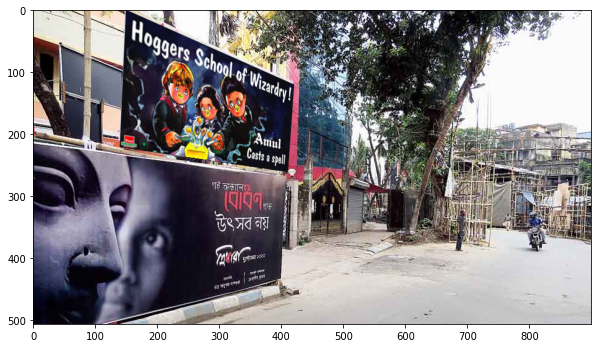

In [ ]:
A = []
for i in range(len(pts1_b)):
  A.append([0, 0, 0, pts1_b[i][0], pts1_b[i][1], 1, -pts2_b[i][1]*pts1_b[i][0], -pts2_b[i][1]*pts1_b[i][1], -pts2_b[i][1]])
  A.append([pts1_b[i][0], pts1_b[i][1], 1, 0, 0, 0, -pts2_b[i][0]*pts1_b[i][0], -pts2_b[i][0]*pts1_b[i][1], -pts2_b[i][0]])
A=np.array(A)
U,D,V = np.linalg.svd(A)
H_cal = V[-1,:].reshape(3,3)
H_cal = H_cal/V[-1,-1]
b1_warp = cv2.warpPerspective(b1, H_cal, (b2.shape[1], b2.shape[0]))
pts2_b = np.array(pts2_b)

cv2.fillConvexPoly(b2, pts2_b.astype(int), 0, 16)
    
# Add warped source image to destination image.
b_final = b2 + b1_warp

# Display image.
plt.figure(figsize =(10,10))
plt.imshow(cv2.cvtColor( b_final,cv2.COLOR_BGR2RGB))


## 2nd use case of Homography: Aligning Documents

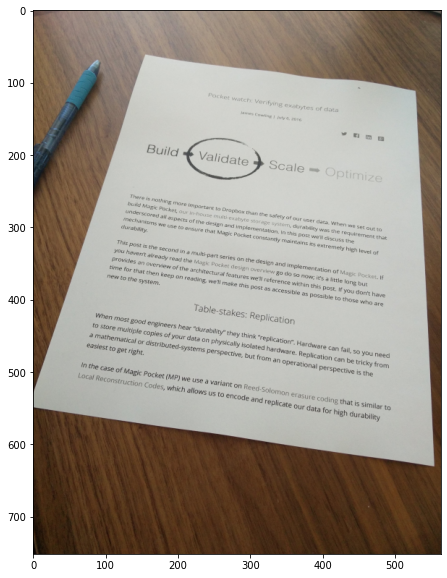

In [ ]:
tilt = cv2.imread("tilt.png")
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(tilt, cv2.COLOR_BGR2RGB))

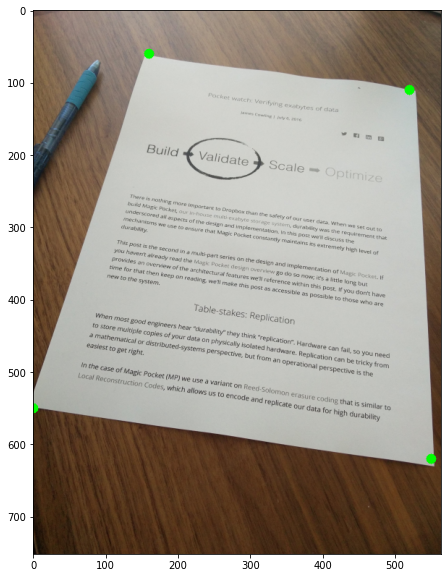

In [ ]:
pts1 = [(160,60),(0,550),(550,620),(520,110)]
pts2= [(0,0),(0,750),(600,750),(600,0)]
tilt_copy = tilt.copy()
for pt in pts1:
  cv2.circle(tilt_copy, pt,radius =0,color=(0,255,0),thickness=14)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(tilt_copy, cv2.COLOR_BGR2RGB))

In [ ]:
A = []
for i in range(len(pts1)):
  A.append([0, 0, 0, pts1[i][0], pts1[i][1], 1, -pts2[i][1]*pts1[i][0], -pts2[i][1]*pts1[i][1], -pts2[i][1]])
  A.append([pts1[i][0], pts1[i][1], 1, 0, 0, 0, -pts2[i][0]*pts1[i][0], -pts2[i][0]*pts1[i][1], -pts2[i][0]])
A=np.array(A)
U,D,V = np.linalg.svd(A)
H_cal = V[-1,:].reshape(3,3)
H_cal = H_cal/V[-1,-1]
b1_warp = cv2.warpPerspective(b1, H_cal, (b2.shape[1], b2.shape[0]))

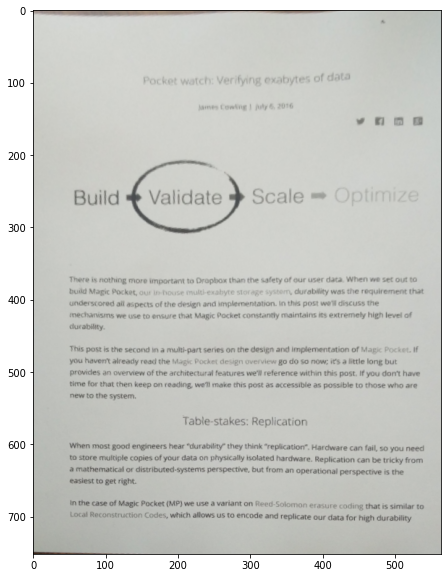

In [ ]:
img1_warp = cv2.warpPerspective(tilt, H_cal, (tilt.shape[1], tilt.shape[0]))
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img1_warp, cv2.COLOR_BGR2RGB))